In [3]:
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('train.csv')


In [5]:
df.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


counting all the data in each variables, we have 36633 qualifications of 38312 workers. Checking for missing values values

In [6]:
df.sort_values('Qualification', na_position = 'first' ).head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
15,YAK/S/00022,Customer Support and Field Operations,NaN,Male,Direct Internal process,2,1980,10.0,2008,0,0,49,RIVERS,Yes,Married,No,No,1,0
22,YAK/S/00033,Commercial Sales and Marketing,NaN,Female,Direct Internal process,2,1997,2.5,2017,0,0,40,EDO,Yes,Married,No,No,1,0
28,YAK/S/00044,Commercial Sales and Marketing,NaN,Male,Agency and others,4,1997,5.0,2017,0,0,40,CROSS RIVER,Yes,Married,No,No,1,0
60,YAK/S/00091,Commercial Sales and Marketing,NaN,Female,Direct Internal process,2,2001,0.0,2018,0,0,47,ZAMFARA,Yes,Single,No,No,2,0
137,YAK/S/00190,Customer Support and Field Operations,NaN,Female,Agency and others,2,1988,10.0,2010,0,0,56,LAGOS,Yes,Single,No,No,5,0


There are missing values in the data which belong to workers whose qualifications were not documented. Replacing the missing values with "Not_Specified"

In [7]:
df.fillna(value = {'Qualification': 'Not_Specified'}, inplace = True)
df.groupby('Qualification').count()

#There are 1679 workers with no documented qualifications

,EmployeeNo,Division,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
Qualification,,,,,,,,,,,,,,,,,,
First Degree or HND,25578,25578,25578,25578,25578,25578,25578,25578,25578,25578,25578,25578,25578,25578,25578,25578,25578,25578
"MSc, MBA and PhD",10469,10469,10469,10469,10469,10469,10469,10469,10469,10469,10469,10469,10469,10469,10469,10469,10469,10469
Non-University Education,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586
Not_Specified,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679


How many workers were promoted and not ?

In [8]:
count = df.groupby('Promoted_or_Not')

count.count()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
Promoted_or_Not,,,,,,,,,,,,,,,,,,
0,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071
1,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241


separating the promoted workers from the unpromoted

In [9]:
promoted = df[df['Promoted_or_Not'] == 1]
unpromoted = df[df['Promoted_or_Not'] == 0]

Overall Number of unpromoted and promoted workers

In [10]:
promoted['Promoted_or_Not'].value_counts()
unpromoted['Promoted_or_Not'].value_counts()

print('The number of promoted workers are',len(promoted['Promoted_or_Not']))
print('The number of unpromoted workers are',len(unpromoted['Promoted_or_Not']))

The number of promoted workers are 3241
The number of unpromoted workers are 35071


Analysing the quantitative data of the workers

In [11]:
#descriptive stat of the promoted workers

promoted.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.0
mean,2.204875,1986.661833,9.173095,2013.311941,0.705955,0.122802,63.210429,1.0
std,0.520554,7.097934,3.647631,4.072705,0.455683,0.328260,14.786093,0.0
min,2.000000,1952.000000,0.000000,1985.000000,0.000000,0.000000,33.000000,1.0
25%,2.000000,1983.000000,7.500000,2012.000000,0.000000,0.000000,51.000000,1.0
50%,2.000000,1988.000000,10.000000,2014.000000,1.000000,0.000000,63.000000,1.0
75%,2.000000,1992.000000,12.500000,2016.000000,1.000000,0.000000,75.000000,1.0
max,7.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.0


The analysis of the promoted workers

1. The minimum attendance of the training is 2 which means there are workers that attended trainings just twice. The hightest    attendancde is 7

2. some workers scored zero in their last performance. The average score is approximately 9 while the highest score is 12.5

3. some workers did not meet their targets.But apparently most of them met their targets.

4. Most of them are without a previous award

5. Most of them performed well in their training score average, however there is a minimum score of 33

why were workers with zero performance promoted ?
why were workers with no targets met promoted ?

In [12]:
#descriptive stat of the unpromoted workers

unpromoted.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,35071.000000,35071.000000,35071.000000,35071.000000,35071.000000,35071.000000,35071.000000,35071.0
mean,2.258191,1986.167517,7.562730,2013.123777,0.320379,0.013943,54.641584,0.0
std,0.616823,7.693481,3.723637,4.278179,0.466629,0.117257,12.986717,0.0
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.0
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.0
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.0
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,65.000000,0.0
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,88.000000,0.0


The analysis of the unpromoted workers

1. The minimum attendance of the training is 2 which means there are workers that attended trainings just twice. The hightest    attendancde is 11

2. some workers scored zero in their last performance. The average score is approximately 8 while the highest score is 12.5

3. some workers met their targets.But apparently most of them didn't meet their targets.

4. Most of them are without a previous award

5. Most of them performed well in their training score average, however there is a minimum score of 1

why was a worker with targets met not promoted?

why was a worker with good last_performance of 12.5 score not promoted?

why was a worker with Training_score_average of 88 not promoted?

validating the quantitative data with their frequency distribution

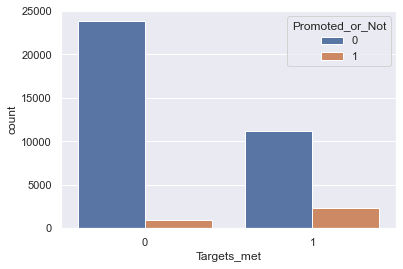

In [13]:
sns.countplot(x = df['Targets_met'], hue = df['Promoted_or_Not'])

The average value for the Targets met by the promoted workers exceeds that of the unpromoted, but the frequency distribution confirms that more unpromoted workers met their targets than the promoted workers.

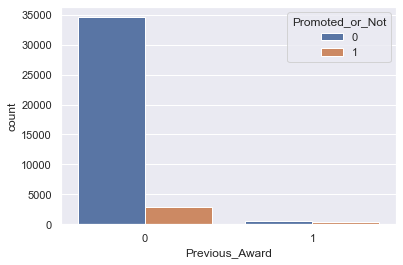

In [14]:
sns.countplot(x = df['Previous_Award'], hue = df['Promoted_or_Not'])

some workers were promoted without previous awards. 

The proportion of promoted workers without previous awards is more than the promoted workers with previous awards



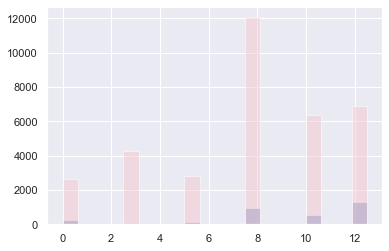

In [16]:
#frequency distribution of the last performance score

promoted['Last_performance_score'].hist(histtype = 'stepfilled',bins = 20, alpha = 0.5)

unpromoted['Last_performance_score'].hist(histtype = 'stepfilled',bins = 20, alpha = 0.5, color = sns.desaturate('pink', .75))

pink represents the frequency distribution of the unpromoted workers blue represents the frequency distribution of the promoted workers

From this visualization, in each score data, number of unpromoted workers to unpromoted workers is high. 

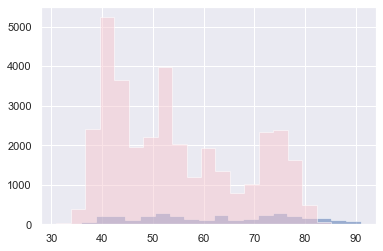

In [15]:
#frequency distribution of the training score average

promoted['Training_score_average'].hist(histtype = 'stepfilled',bins = 20, alpha = 0.5)

unpromoted['Training_score_average'].hist(histtype = 'stepfilled',bins = 20, alpha = 0.5, color = sns.desaturate('pink', .75))

pink represents the frequency distribution of the unpromoted workers

blue represents the frequency distribution of the promoted workers

From this visualization, the frequency distribution of the training score average of the unpromoted workers is far more than the promoted workers.

Why were they not promoted ?

Let's examine their targets and qualifications.

Using the average values of the numeric data of the promoted workers as the reference point:

Last_performance_score : 9.173095

Training_score_average  : 63.210429

c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


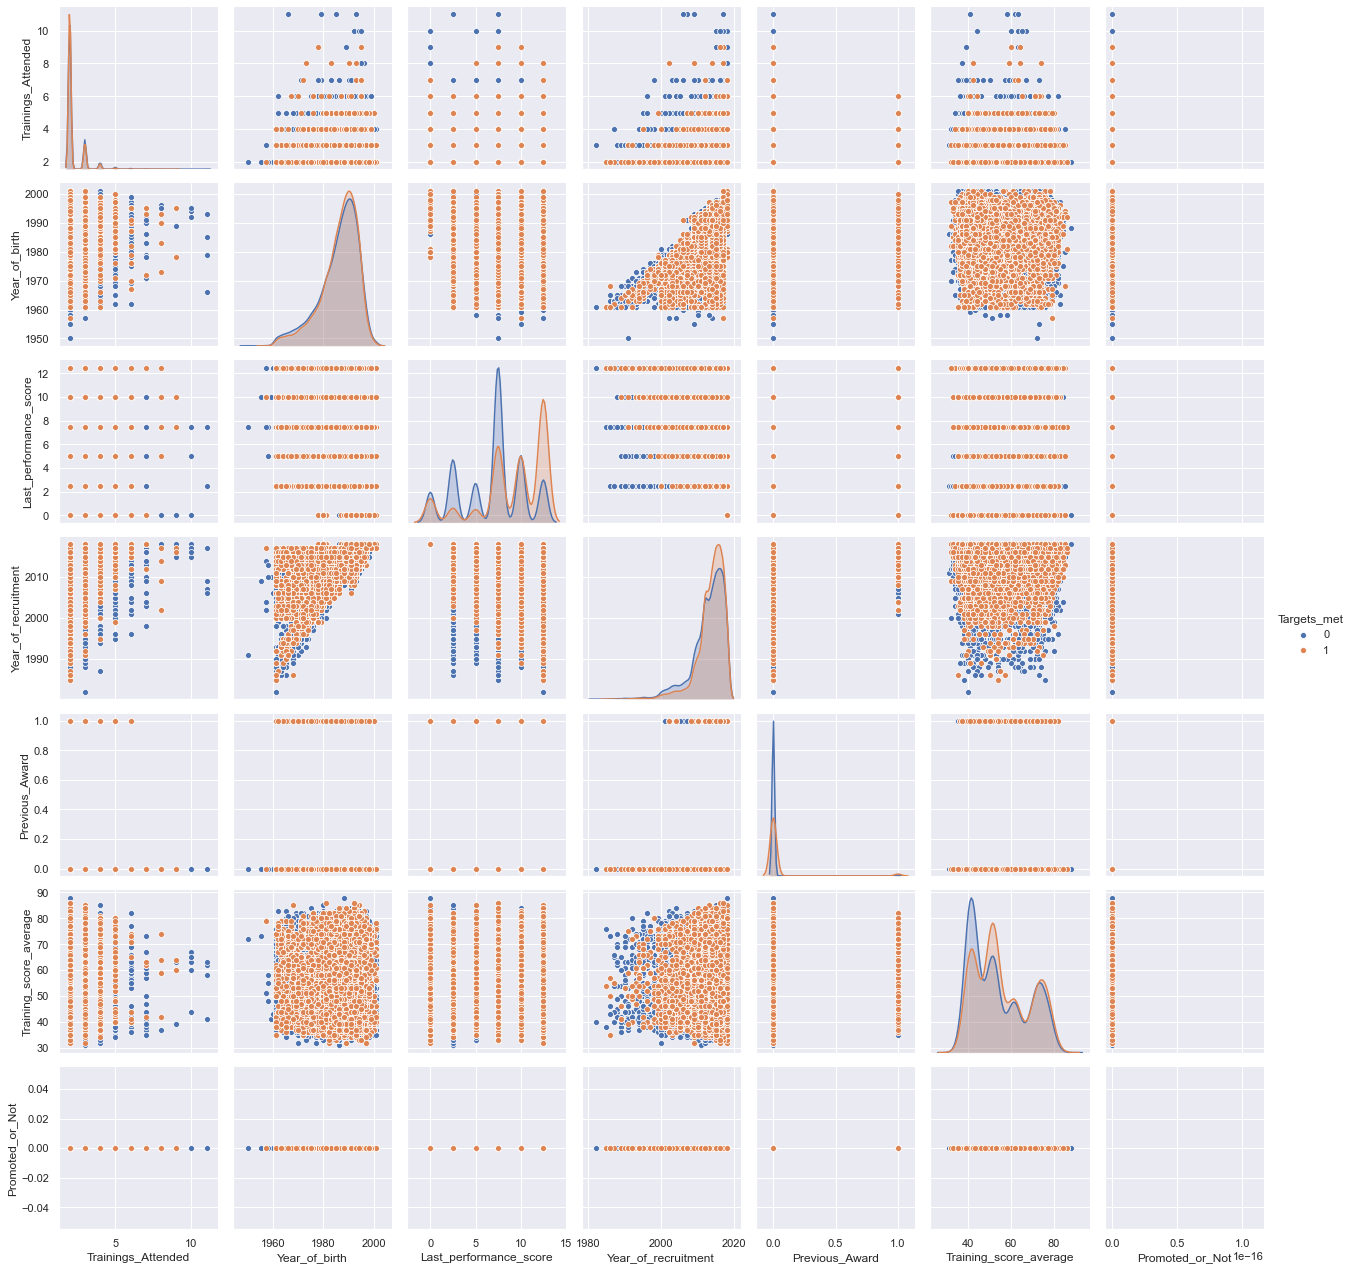

In [27]:
sns.pairplot(unpromoted, hue = 'Targets_met')

From this visualisation, 

The Last_performance_score against Training_score_average, most of the workers met their targets

The worker with the highest Last_performance_score as well as the highest Training_score_average met his/her target

what else could be the reason for not being promoted?

Let's examine their qualifications

c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


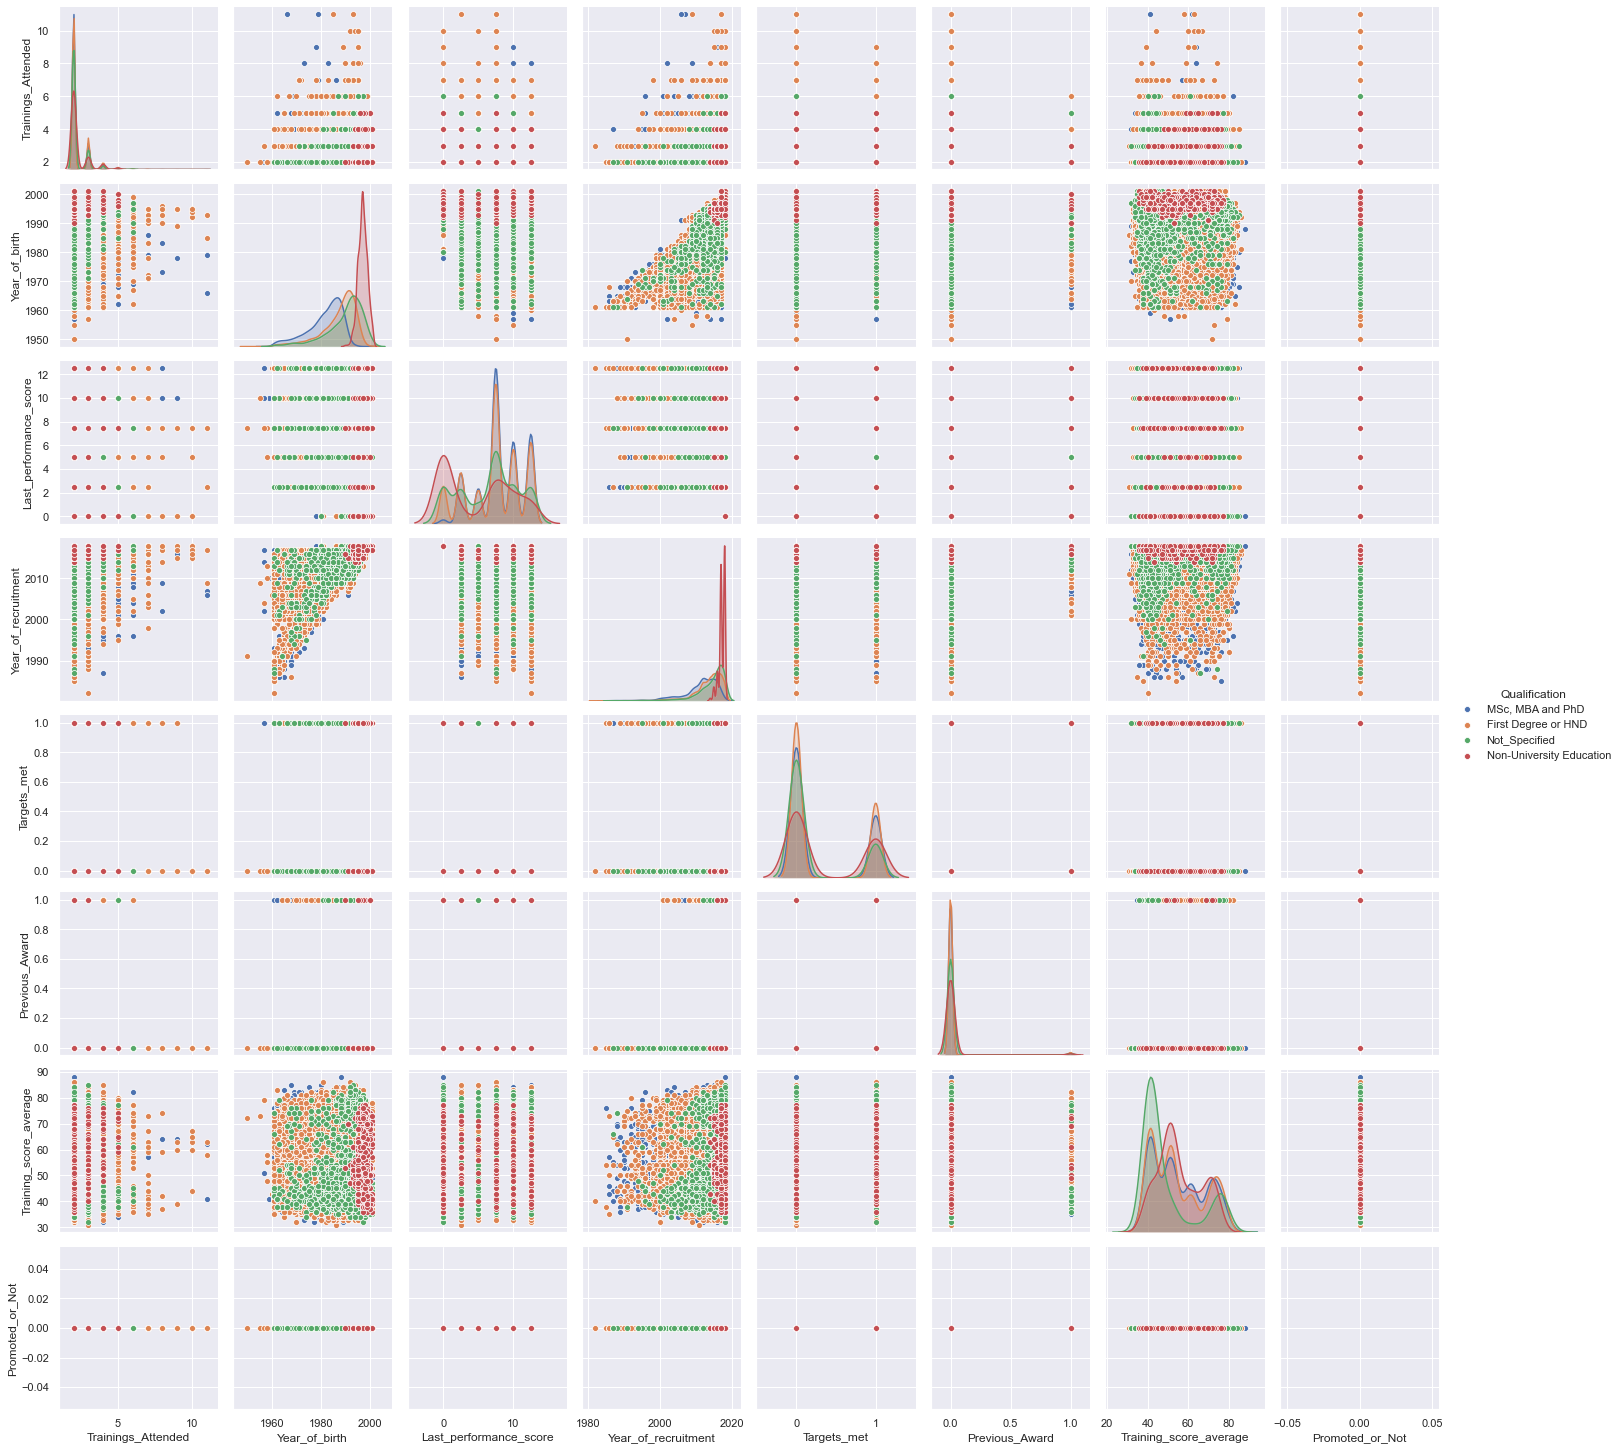

In [28]:
sns.pairplot(unpromoted, hue = 'Qualification')

From this visualization, 

The Last_performance_score against Training_score_average, most of the workers especially the ones above average are without University Education while some were not specified

The Last_performance_score against Training_score_average, most of the workers especially the ones below average are without University Education while some were not specified, so they were not considered for promotion

A worker the highest Last_performance_score as well a very high Training_score_average has an MSC/MBA/PHD as a qualification. The worker also met his/her targets. The worker is foreign schooled 



c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


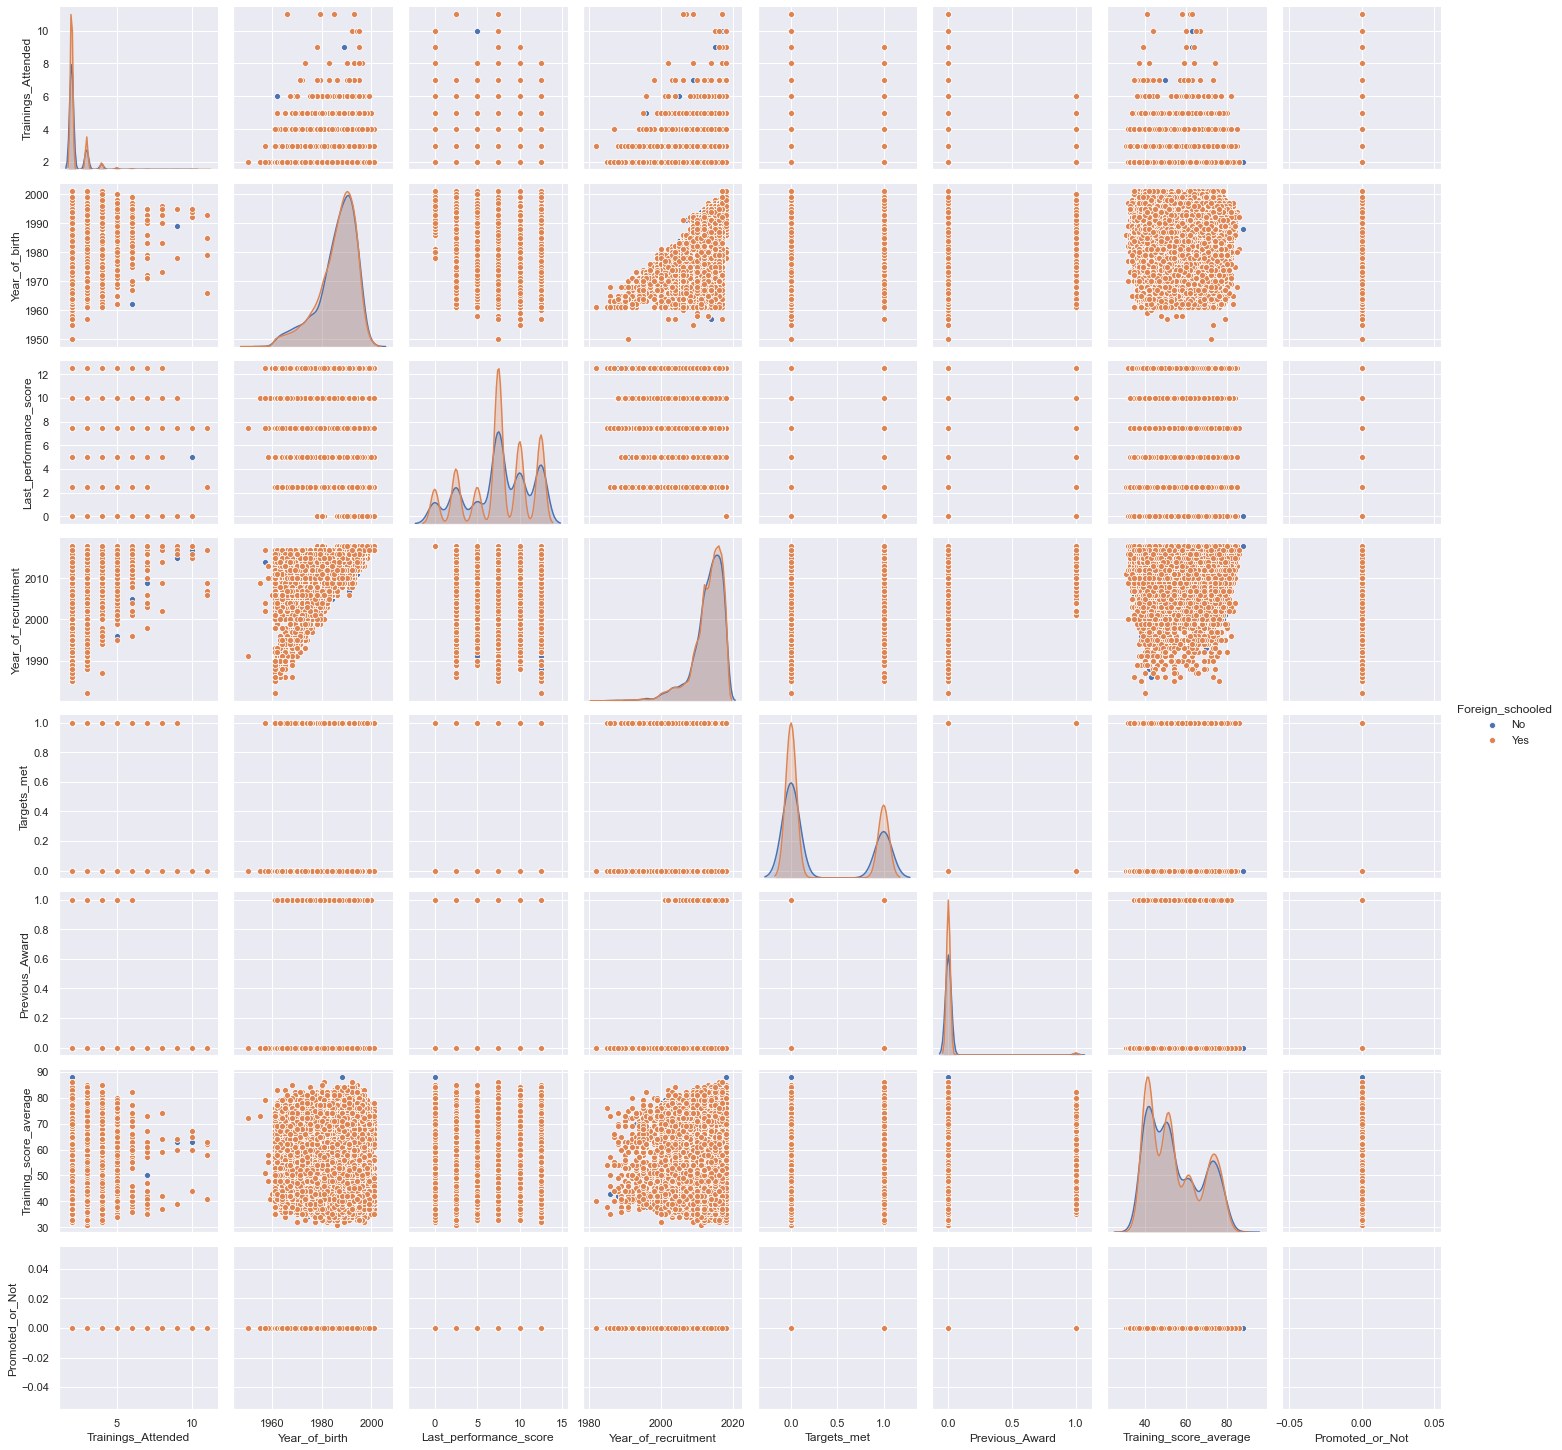

In [38]:
sns.pairplot(unpromoted, hue = 'Foreign_schooled')

There a many unpromoted foreigned schooled workers
The worker with the highest last performance score against training score average is foreign schooled, but his qualification was not specified.

Let's examine the promoted workers

c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


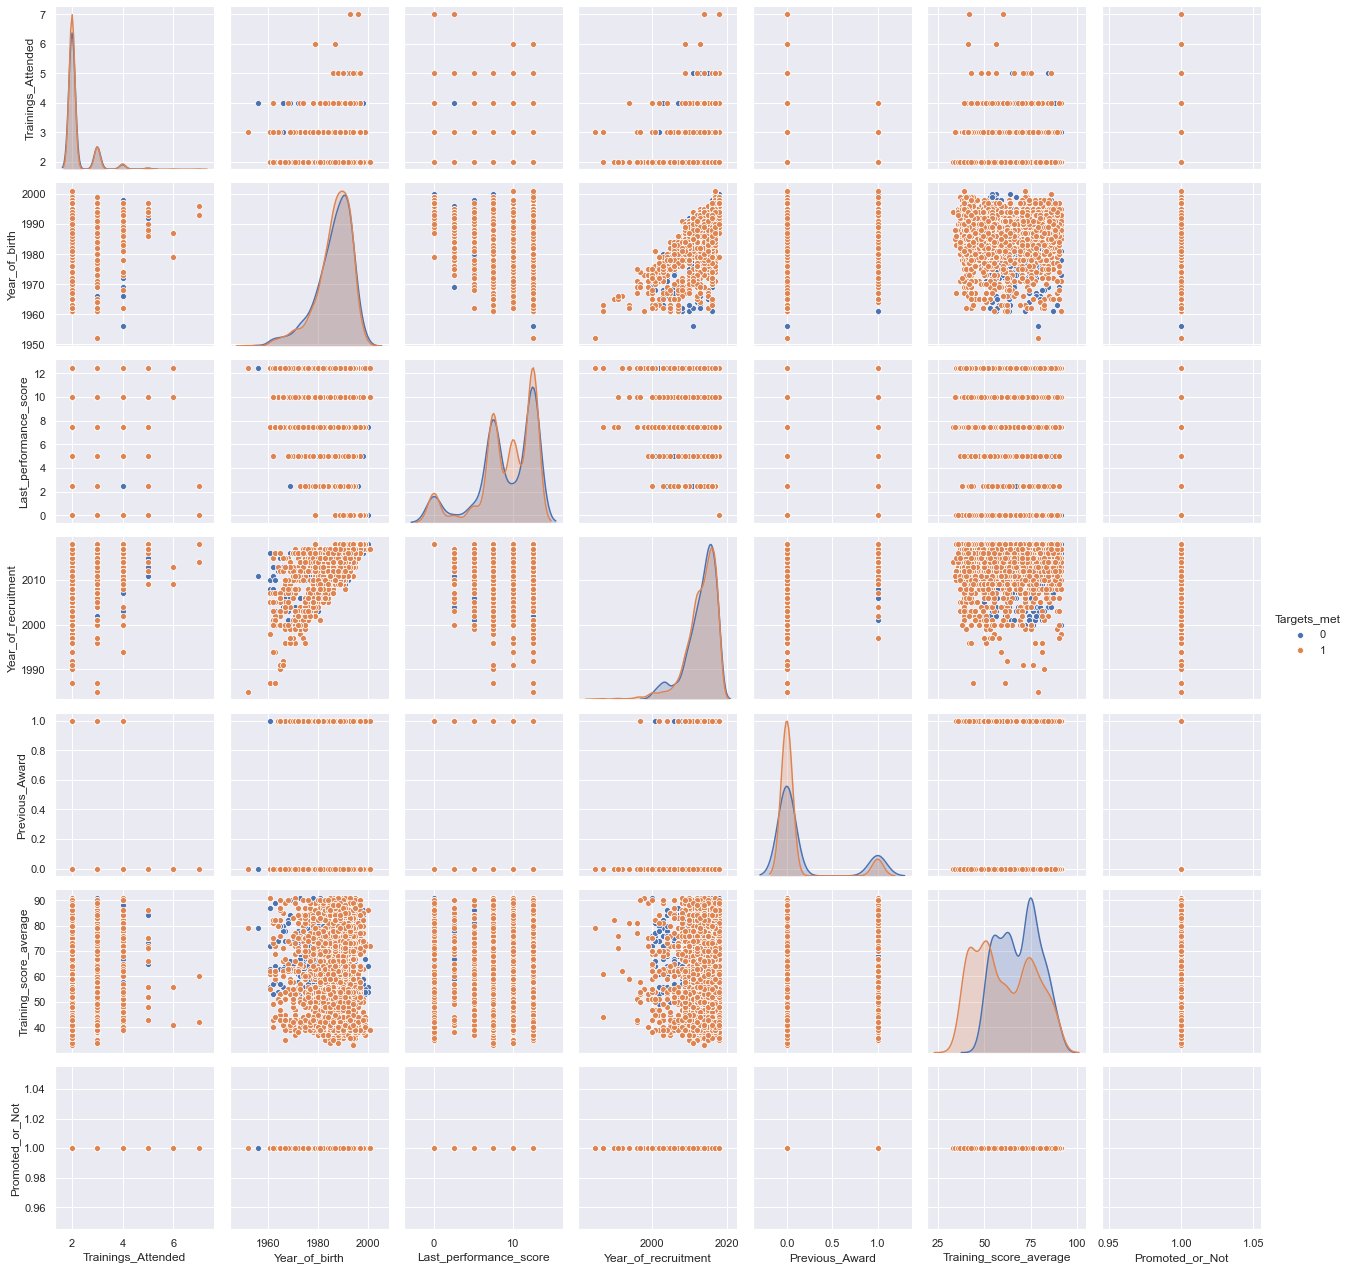

In [29]:
sns.pairplot(promoted, hue = 'Targets_met')

Most of the workers met their targets

some of the workers that didn't meet their targets scored less than average in their training score average

c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


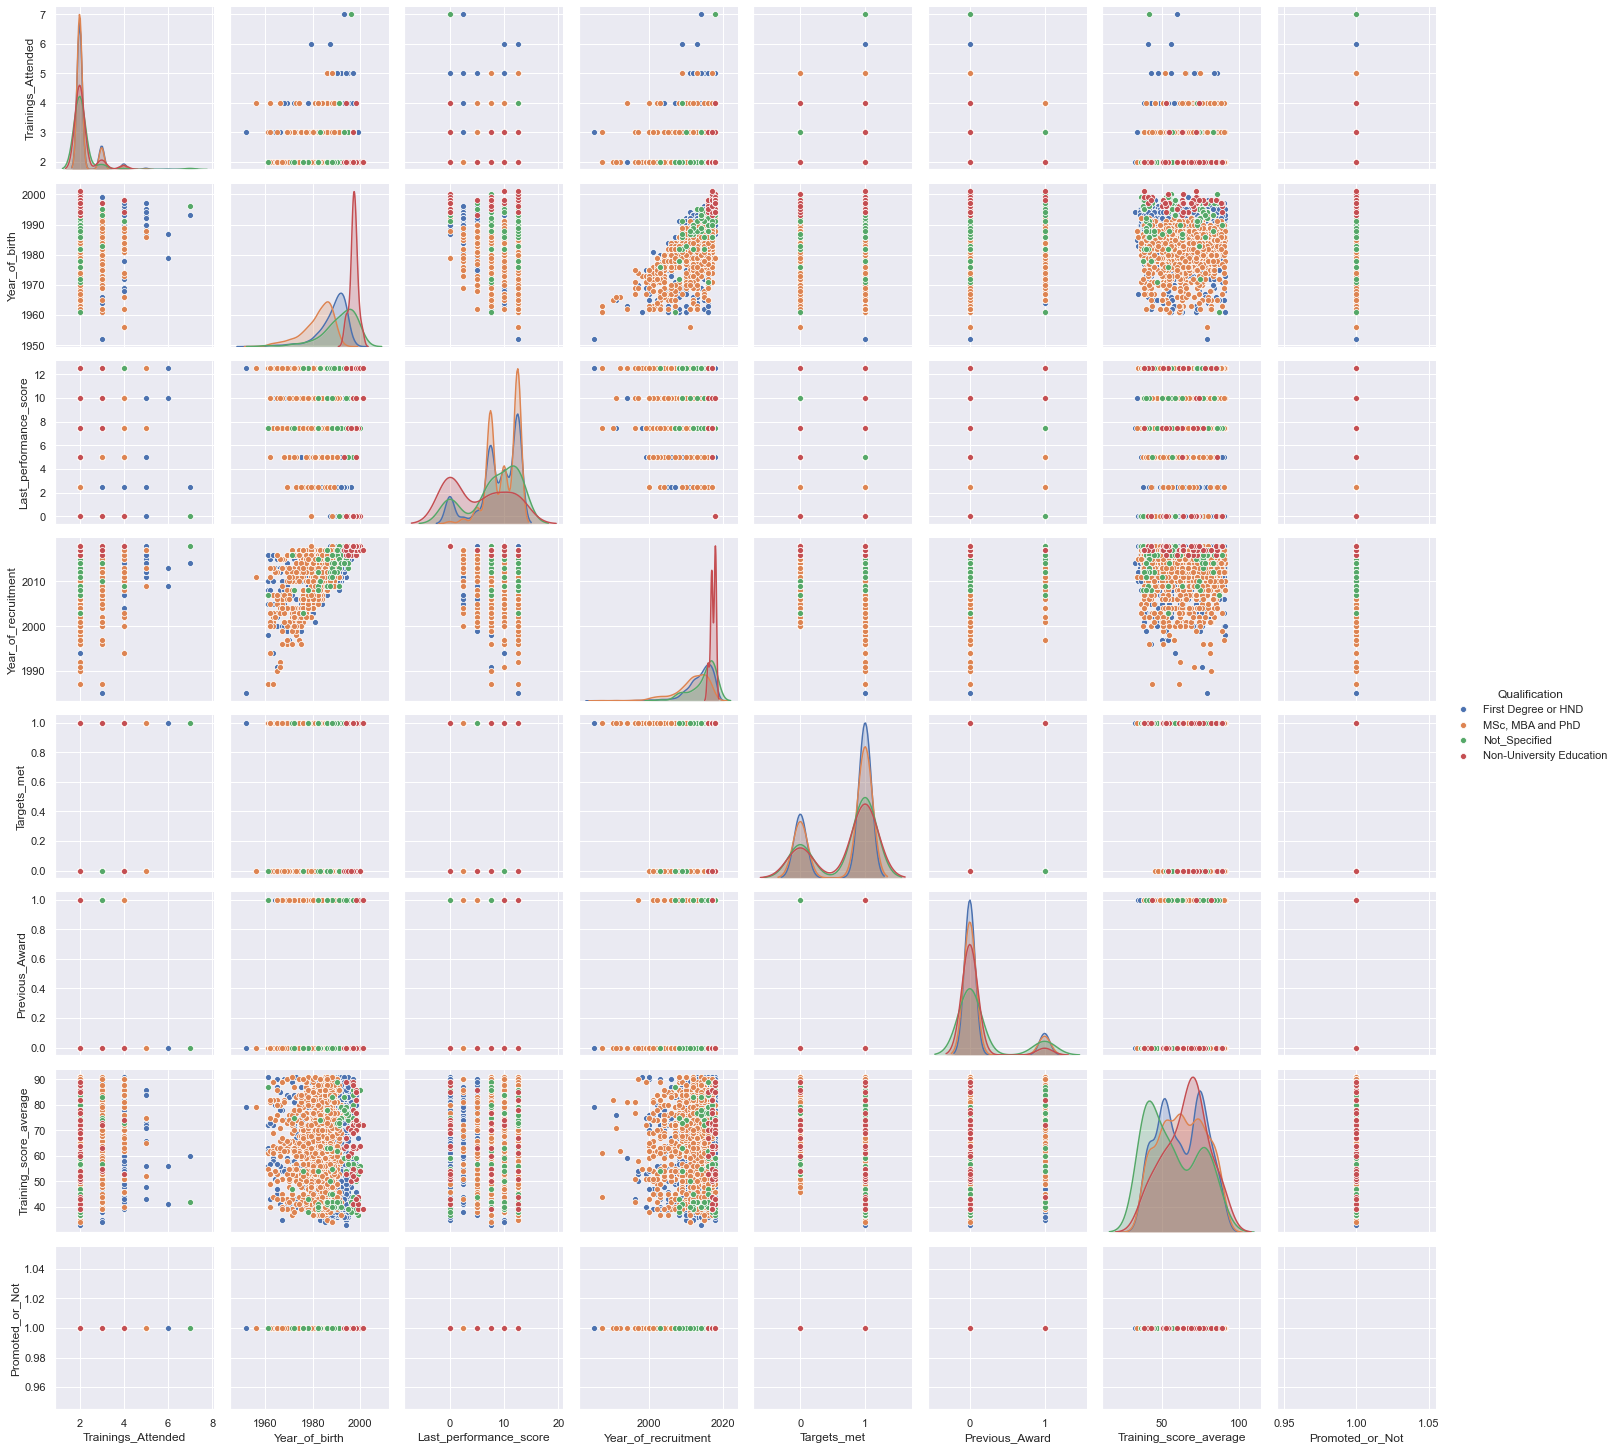

In [36]:
sns.pairplot(promoted, hue = 'Qualification')

The worker the highest Last_performance_score as well as the highest Training_score_average has an MSC/MBA/PHD as a qualification. The worker also met his/her targets

The worker the least Last_performance_score as well as the leaste Training_score_average has a First Degree as a qualification. The worker also met his/her targets

What is the gender of the workers promoted without university education

c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


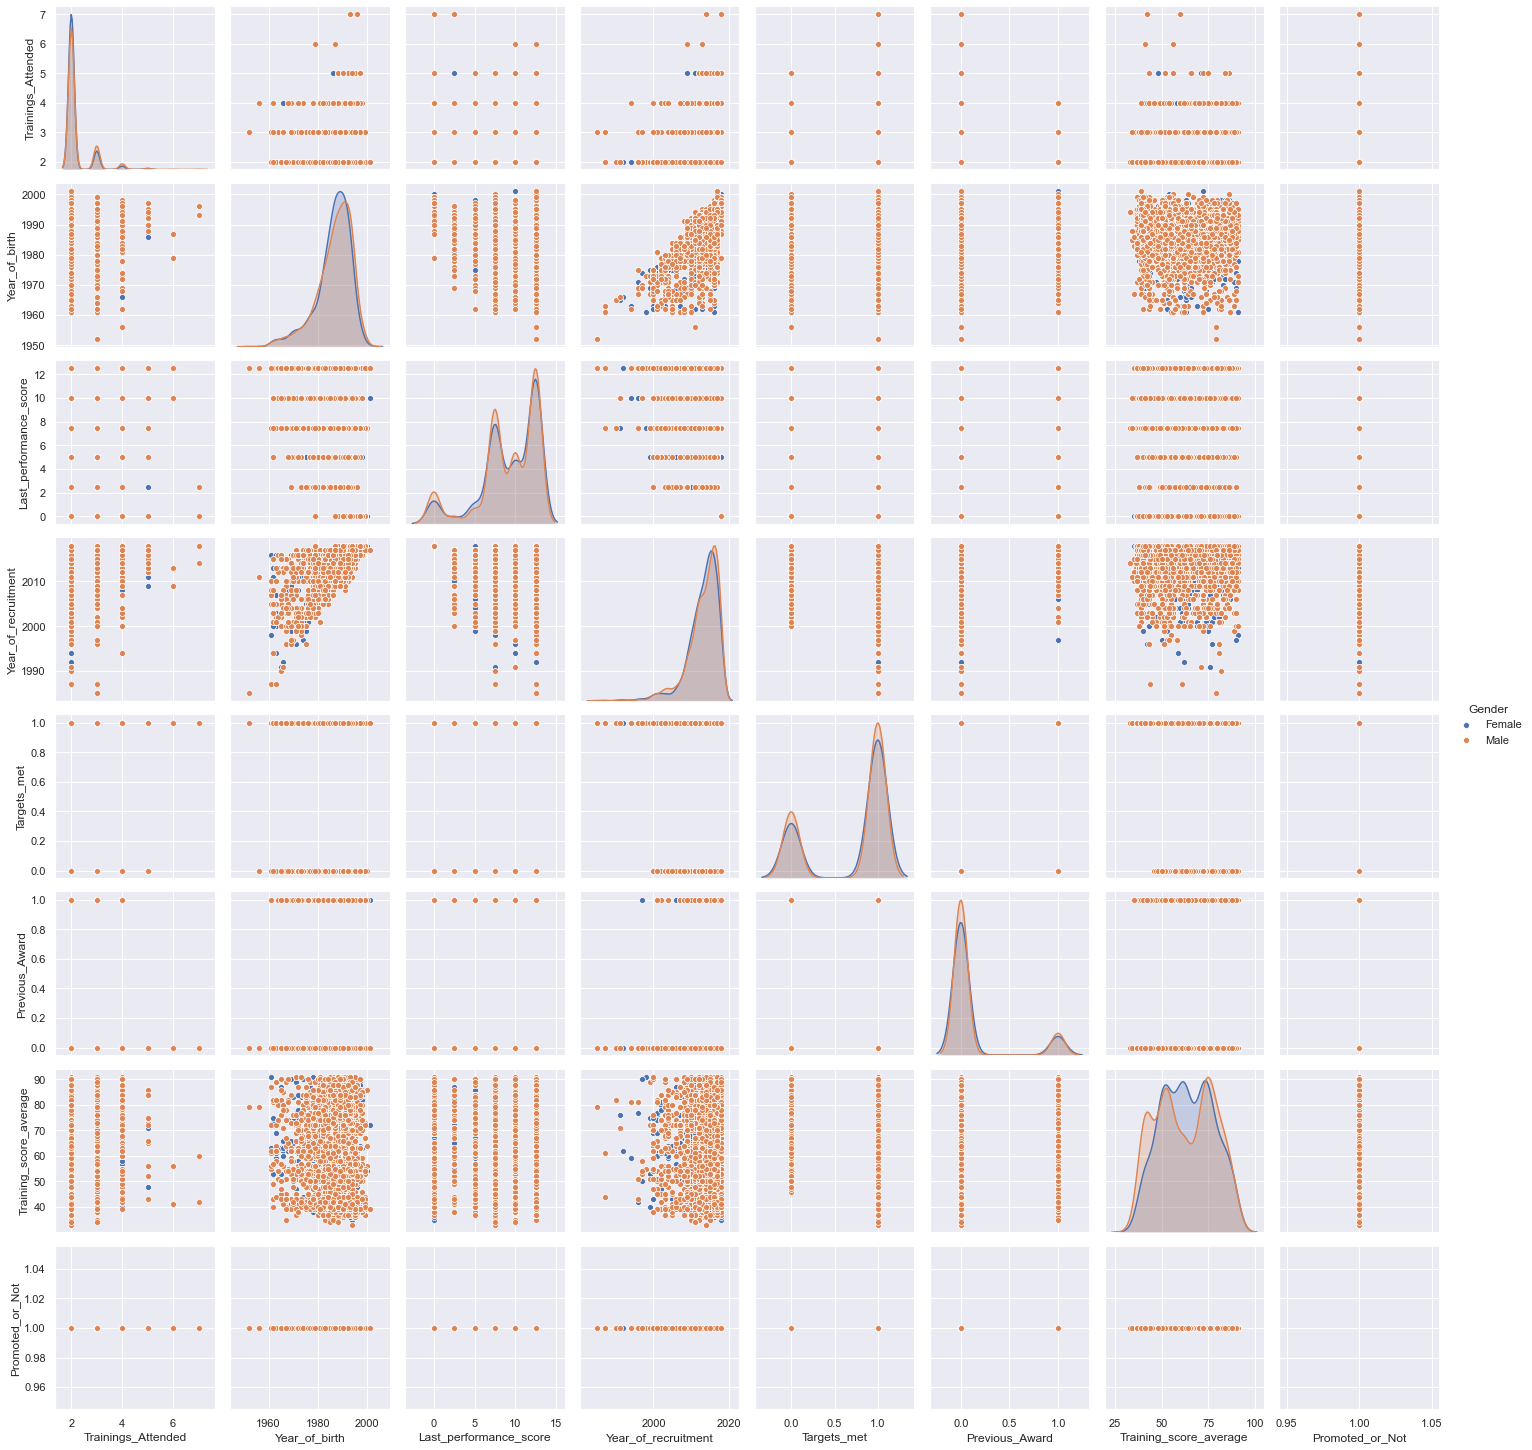

In [34]:
sns.pairplot(promoted, hue = 'Gender')

most of the workers promoted without university education are males

The workers that scored below average in the last performance and training score, were they promoted because of they were foreign schooled ?

c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\uju nobei\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


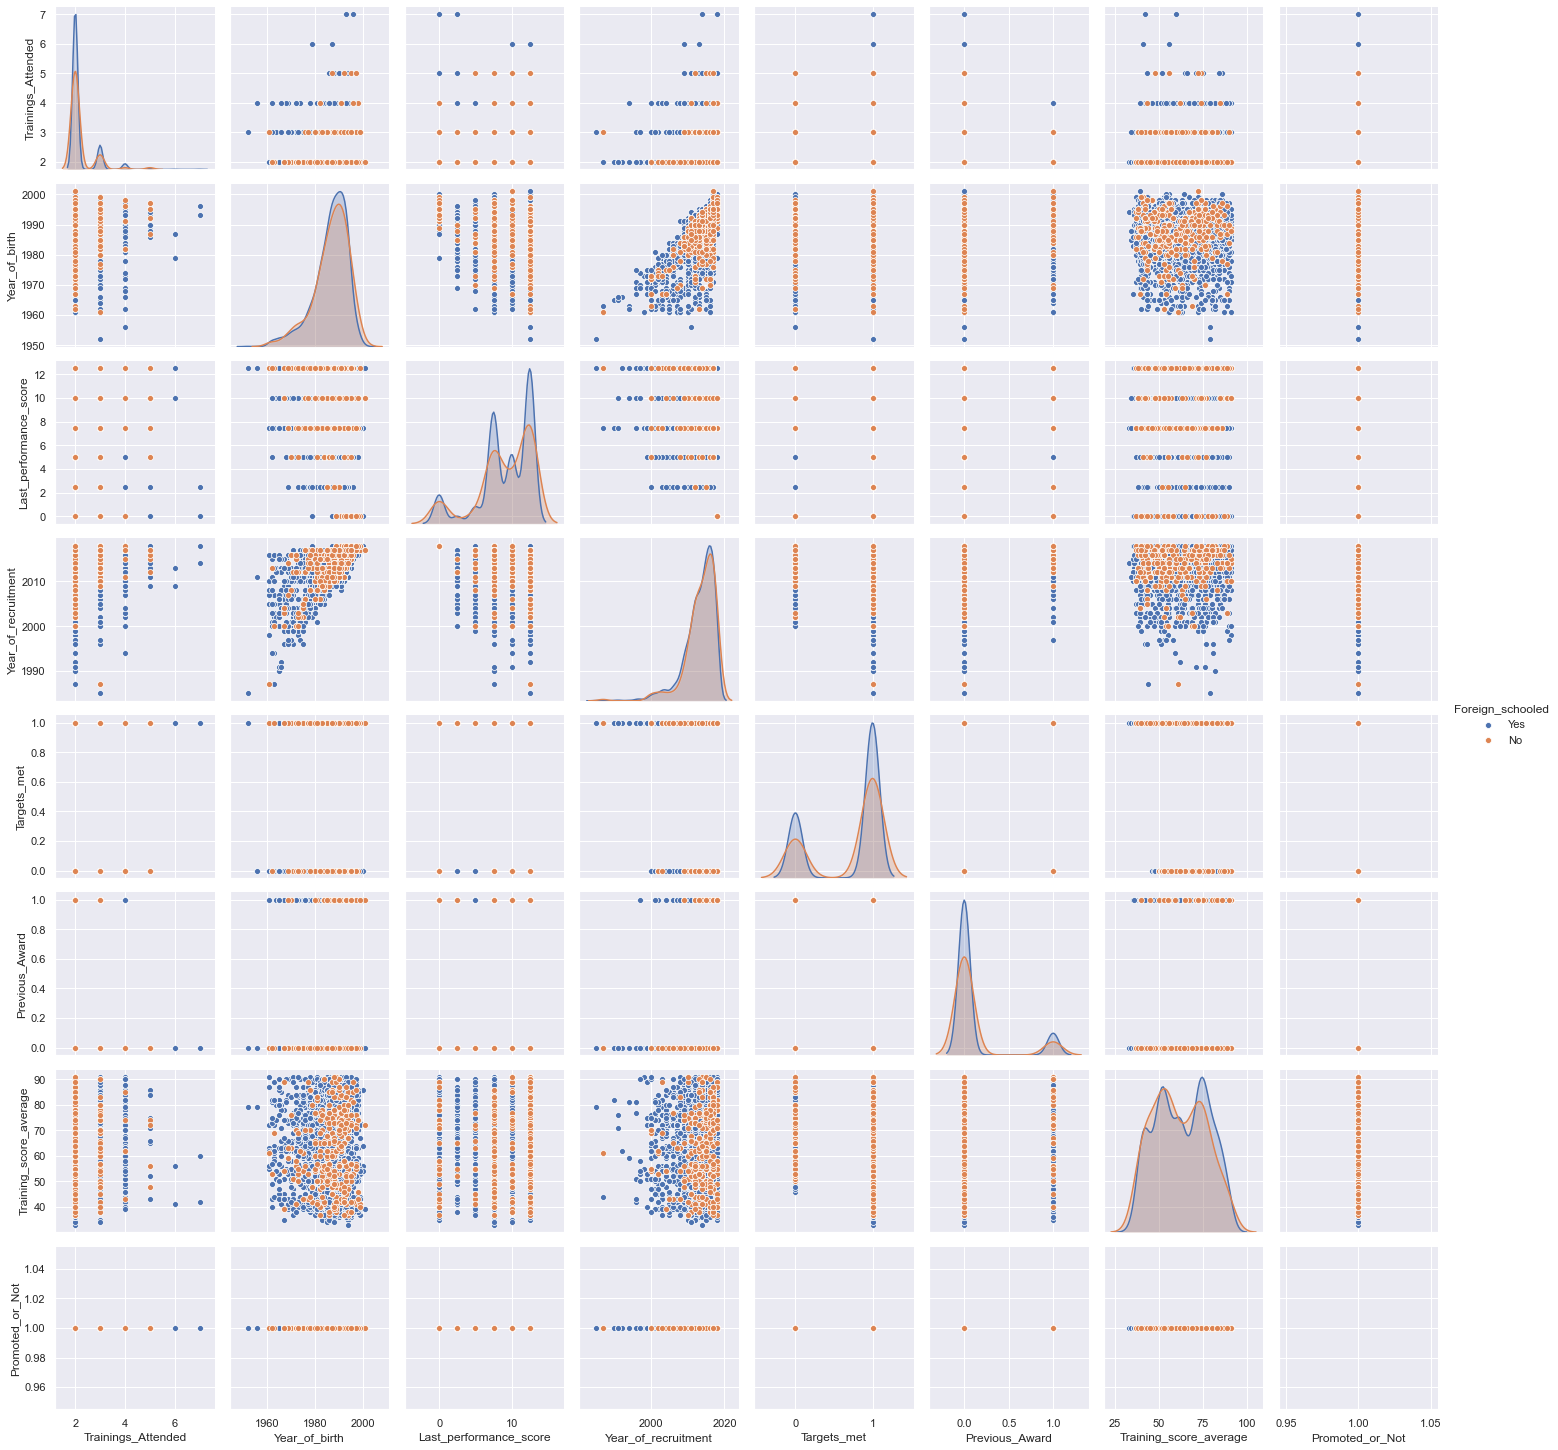

In [35]:
sns.pairplot(promoted, hue = 'Foreign_schooled')

Most of them were Foreign schooled. They met their targets

They might have been promoted based on this reason



conclusion:

some of the unpromoted workers have got what it takes to be promoted, some don't

But considering some workers promoted with scores below average and targets met while some were not even though they are foreign schooled, definitely this promotion is biased and skewed